In [3]:
#Import the required packages for the assignment

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#Import the training dataset
df = pd.read_csv('../data/raw/train.csv')

In [12]:
#Show key statistics for the dataset
df.describe()

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,6856.971000,7798.50000,62.777875,18.576662,7.267088,2.807037,6.231212,44.608900,0.264525,0.816562,...,1.947788,71.365825,1.077838,2.168500,3.245300,1.624513,0.648687,0.245212,1.257763,0.833625
std,3977.447579,2309.54541,17.118774,8.935263,4.318732,1.693373,3.584559,6.155453,0.384093,1.060964,...,1.252352,10.430447,0.785670,1.392224,2.085154,1.355986,0.407626,0.821037,0.723270,0.372440
min,4.000000,3799.00000,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,...,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000,0.000000
25%,3413.750000,5798.75000,51.000000,12.000000,4.100000,1.600000,3.600000,40.400000,0.000000,0.100000,...,1.000000,65.000000,0.500000,1.100000,1.700000,0.700000,0.300000,0.100000,0.700000,1.000000
50%,6787.500000,7798.50000,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,...,1.700000,71.400000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000,1.000000
75%,10299.250000,9798.25000,74.000000,23.500000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,...,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000,1.000000
max,13798.000000,11798.00000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,...,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.000000


In [13]:
#Create dataset without the Id and oldID columns
df_analysis = df.drop(columns=["Id_old","Id"])

In [25]:
#show top 5 rows of new dataset
df_analysis.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,2.0,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
1,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,34.9,2.4,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
2,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,0.4,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
3,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,0.9,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
4,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,0.2,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1


<AxesSubplot:>

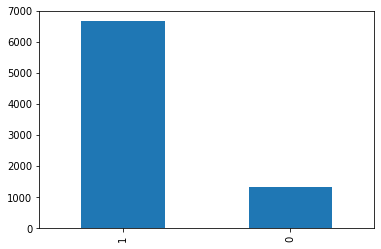

In [27]:
#The target looks like it is all 1? Unbalanced dataset. Will this cause problems down the track?
df_analysis['TARGET_5Yrs'].value_counts().plot(kind='bar')

In [29]:
#Pop into a new variable the target column
target = df_analysis.pop('TARGET_5Yrs')

In [39]:
#Grab the correlation matrix - lots of variables

df_analysis.corr()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
GP,1.000000,0.608090,0.578344,0.577697,0.553374,0.278510,0.123231,0.119146,0.045434,0.524276,0.519154,0.155667,0.402654,0.492070,0.484485,0.402126,0.473409,0.187269,0.537821
MIN,0.608090,1.000000,0.904840,0.895957,0.895085,0.234919,0.358597,0.372454,0.153846,0.767647,0.753660,0.212366,0.542782,0.770128,0.728842,0.639013,0.759933,0.260428,0.792059
PTS,0.578344,0.904840,1.000000,0.989208,0.973297,0.301991,0.337786,0.349452,0.156044,0.864463,0.842903,0.257157,0.539289,0.690687,0.673621,0.573893,0.678514,0.232923,0.816414
FGM,0.577697,0.895957,0.989208,1.000000,0.972670,0.343140,0.288906,0.299300,0.123230,0.810273,0.798366,0.208038,0.565086,0.699456,0.689229,0.550682,0.663419,0.245199,0.799119
FGA,0.553374,0.895085,0.973297,0.972670,1.000000,0.140998,0.373362,0.399025,0.203040,0.787989,0.761174,0.263515,0.464325,0.635072,0.607930,0.619597,0.689391,0.191895,0.816810
FG%,0.278510,0.234919,0.301991,0.343140,0.140998,1.000000,-0.269994,-0.330586,-0.312446,0.279252,0.335512,-0.187200,0.539317,0.429142,0.490902,-0.132006,0.071364,0.288155,0.128622
3P Made,0.123231,0.358597,0.337786,0.288906,0.373362,-0.269994,1.000000,0.979340,0.585280,0.149567,0.088516,0.320845,-0.200575,0.076694,-0.014098,0.375967,0.305817,-0.094750,0.231413
3PA,0.119146,0.372454,0.349452,0.299300,0.399025,-0.330586,0.979340,1.000000,0.576168,0.165116,0.101186,0.335011,-0.213506,0.069782,-0.023208,0.409646,0.337407,-0.101143,0.255422
3P%,0.045434,0.153846,0.156044,0.123230,0.203040,-0.312446,0.585280,0.576168,1.000000,0.013036,-0.054517,0.339894,-0.297108,-0.105370,-0.181554,0.291623,0.195759,-0.169376,0.095169
FTM,0.524276,0.767647,0.864463,0.810273,0.787989,0.279252,0.149567,0.165116,0.013036,1.000000,0.975611,0.274606,0.544742,0.619711,0.625154,0.486761,0.591616,0.221537,0.771939


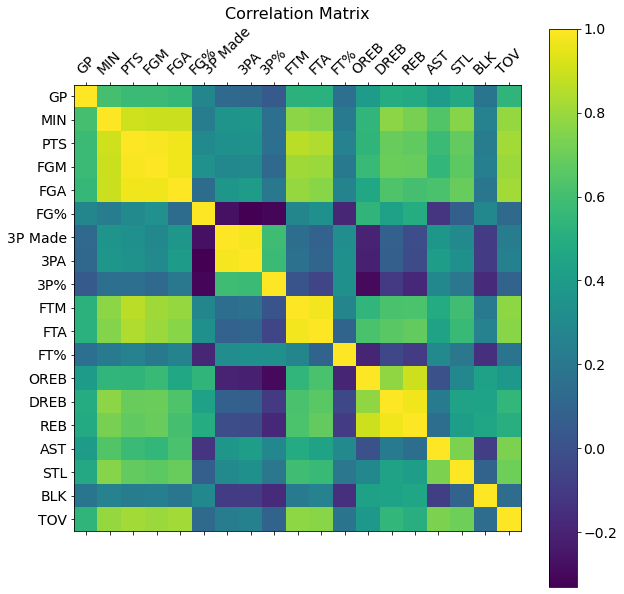

In [36]:
#Visualise the correlation matrix
f = plt.figure(figsize=(10, 10))
plt.matshow(df_analysis.corr(),fignum=f.number)
plt.xticks(range(df_analysis.shape[1]), df_analysis.columns, fontsize=14,rotation=45)
plt.yticks(range(df_analysis.shape[1]), df_analysis.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [50]:
#scale the variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled= scaler.fit_transform(df_analysis)


In [67]:
#Split the training dataset into validation and training set
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split (df_scaled, target, test_size=0.2, random_state=8)


In [118]:
#Do a baseline model with all the variables and no regularisation penalty
from sklearn.linear_model import LogisticRegression
model_1=LogisticRegression(penalty = 'none')
model_1.fit(X_train, y_train)
model_1.predict(X_valid)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

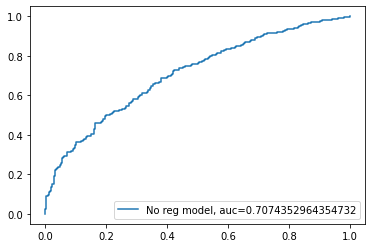

In [156]:
#get the AOC metric and plot the curve
from sklearn import metrics

y_pred_proba = model_1.predict_proba(X_valid)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_valid,  y_pred_proba)
auc = metrics.roc_auc_score(y_valid, y_pred_proba)
plt.plot(fpr,tpr,label="No reg model, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [152]:
np.round(model_1.coef_,1)

array([[ 0.5,  0.1, -0.2,  0.3, -0.1,  0.2,  0.7, -0.7,  0. , -0.3,  0.4,
         0.1,  0.6,  0.4, -0.9,  0.2, -0. ,  0.1, -0.1]])

In [157]:
#There are 17 features with co-efficients > 0. Do the same model but with L1 penalty to select features
model_1_l1=LogisticRegression(penalty = 'l1', solver ='liblinear')
model_1_l1.fit(X_train, y_train)
model_1_l1.predict(X_valid)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

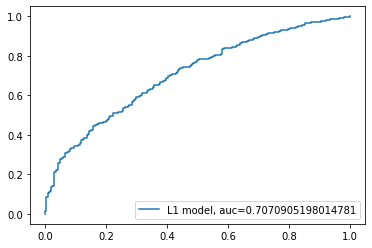

In [158]:
y_pred_proba = model_1_l1.predict_proba(X_valid)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_valid,  y_pred_proba)
auc = metrics.roc_auc_score(y_valid, y_pred_proba)
plt.plot(fpr,tpr,label="L1 model, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [159]:
#There are 14 features with coefficient > 0 in when L1 regularisation is applied.
#The area under the AOC curve is also still ~ 0.7
np.round(model_1_l1.coef_,1)

array([[ 0.5,  0.1,  0. ,  0. , -0. ,  0.2,  0.6, -0.6,  0. , -0.1,  0.2,
         0.1,  0.5,  0.1, -0.3,  0.2, -0. ,  0.1, -0.1]])

In [160]:
# Do the same model but with L2 penalty to select features
model_1_l2=LogisticRegression(penalty = 'l2')
model_1_l2.fit(X_train, y_train)
model_1_l2.predict(X_valid)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

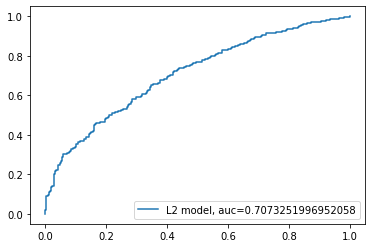

In [161]:
y_pred_proba = model_1_l2.predict_proba(X_valid)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_valid,  y_pred_proba)
auc = metrics.roc_auc_score(y_valid, y_pred_proba)
plt.plot(fpr,tpr,label="L2 model, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [155]:
np.round(model_1_l2.coef_,1)

array([[ 0.5,  0.1, -0.1,  0.2, -0.1,  0.2,  0.7, -0.6,  0. , -0.2,  0.3,
         0.1,  0.5,  0.3, -0.6,  0.2, -0. ,  0.1, -0.1]])

In [162]:
#Applying the L2 regularisation also leads to 17 coefficients > 0 and AOC ~.70
#compare all the model co-efficients and see if they make sense

In [188]:
co_efficients=np.vstack((np.round(model_1.coef_,1),np.round(model_1_l1.coef_,1),np.round(model_1_l2.coef_,1)))

In [193]:
pd.DataFrame(co_efficients, columns=df_analysis.columns)

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,0.5,0.1,-0.2,0.3,-0.1,0.2,0.7,-0.7,0.0,-0.3,0.4,0.1,0.6,0.4,-0.9,0.2,-0.0,0.1,-0.1
1,0.5,0.1,0.0,0.0,-0.0,0.2,0.6,-0.6,0.0,-0.1,0.2,0.1,0.5,0.1,-0.3,0.2,-0.0,0.1,-0.1
2,0.5,0.1,-0.1,0.2,-0.1,0.2,0.7,-0.6,0.0,-0.2,0.3,0.1,0.5,0.3,-0.6,0.2,-0.0,0.1,-0.1
